In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
# import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from matplotlib import ticker

In [2]:
N = 800
total=np.zeros((1,10))
faulty = []
name = "nonFTSteane_c"
for i in range(N):
    try:  
        test=np.loadtxt('text/{}/{}{}.txt'.format(name,name,i),delimiter=',')             
    except FileNotFoundError:
        faulty.append('{}'.format(i))
        continue
    total=total+test
total = total/(N-len(faulty))
print("Dead files: ", faulty,", ",len(faulty))
N = print(total)

Dead files:  [] ,  0
[[0.00000000e+00 1.11111111e-05 2.22222222e-05 3.33333333e-05
  4.44444444e-05 5.55555556e-05 6.66666667e-05 7.77777778e-05
  8.88888889e-05 1.00000000e-04]
 [7.11458333e-02 7.07291667e-02 7.61666667e-02 7.58645833e-02
  7.64375000e-02 7.72812500e-02 7.96770833e-02 8.04375000e-02
  8.40104167e-02 8.42395833e-02]
 [7.32187500e-02 7.21250000e-02 7.57604167e-02 7.94062500e-02
  8.30625000e-02 8.37291667e-02 8.84062500e-02 8.87604167e-02
  9.15416667e-02 9.13854167e-02]
 [3.20717020e-02 3.15109068e-02 3.42723829e-02 3.38915241e-02
  3.43089292e-02 3.44802126e-02 3.54387344e-02 3.56053574e-02
  3.73051190e-02 3.73899817e-02]
 [3.33967043e-02 3.20926377e-02 3.36965394e-02 3.52875146e-02
  3.69764579e-02 3.68790866e-02 3.91350310e-02 3.88557751e-02
  3.98785905e-02 3.91774553e-02]]


In [3]:
#np.savetxt('text/FTSteane_3rd_q.txt', total, delimiter=",")
#np.savetxt('text/FTRotSurf_3rd_f+.txt', total, delimiter=",")
#np.savetxt('text/FTCarbon_e.txt', total, delimiter=",")

np.savetxt("text/{}.txt".format(name), total, delimiter=",")

#np.savetxt('text/FTCarbon_3rd_c+.txt', total, delimiter=",")

#np.savetxt('text/RotSurfFinal_d.txt', total, delimiter=",")
#np.savetxt('text/SteaneFinal_a+++.txt', total, delimiter=",")

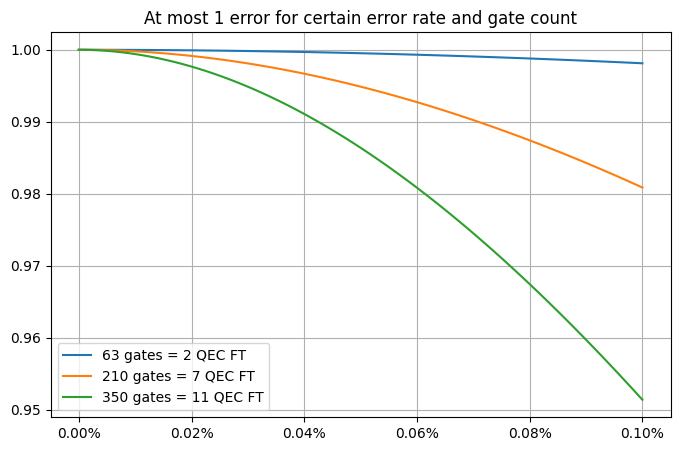

In [29]:
# p = 0.994
# print(p**150)
# print((p**149)*150*(1-p))

g = [63,3*63+21,5*63+35]
fig, ax = plt.subplots(figsize=(8,5))

y = []

for j in g:
    p = np.linspace(0.999,1,100)
    hmm = [(i**(j))+(i**(j-1))*j*(1-i) for i in p]
    y.append(hmm)
    p = [1-i for i in p]
    ax.plot(p,hmm,label="{} gates".format(j)+" = {} QEC FT".format(int(j/30)))

#ax.hlines(0.5,0,0.01, color="red", linewidth=3, linestyles="dotted")
ax.grid()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
plt.legend()
plt.title("At most 1 error for certain error rate and gate count")
plt.show()

/tmp/ipykernel_20216/4141691002.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x = y[1][i]/y[0][i]
/tmp/ipykernel_20216/4141691002.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


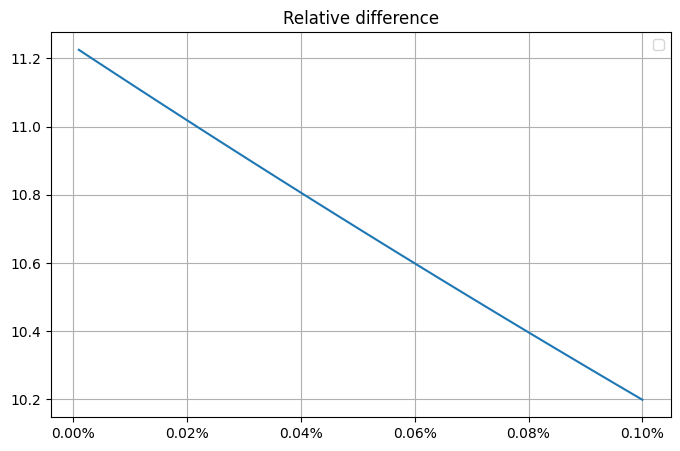

In [30]:
for i in range(len(y)):
    for j in range(len(y[0])):
        y[i][j] = 1 - y[i][j]

k = []

for i in range(len(y[0])):
    x = y[1][i]/y[0][i]
    k.append(x)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(p,k)
ax.grid()
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals = 2))
plt.legend()
plt.title("Relative difference")
plt.show()